# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 5 vs Chr 5p14

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 4

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_05': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-17R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name['chr_05']['0']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-14L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-20L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-25L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-27L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-36L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-3L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-6L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-9L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\181558-10.jpg.5L.bmp',
 'D:\\Users\\Chuan\

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_05': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-10L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-17R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-1

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_05', 'chr_5_p14_deletion'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  4
chr_05
   Train: 
        173550-del(5)(p14)-10L.bmp
        173550-del(5)(p14)-11L.bmp
        173550-del(5)(p14)-12L.bmp
        173550-del(5)(p14)-13L.bmp
        173550-del(5)(p14)-14L.bmp
        173550-del(5)(p14)-15L.bmp
        173550-del(5)(p14)-16L.bmp
        173550-del(5)(p14)-17R.bmp
        173550-del(5)(p14)-18L.bmp
        173550-del(5)(p14)-20L.bmp
        173550-del(5)(p14)-21L.bmp
        173550-del(5)(p14)-22L.bmp
        173550-del(5)(p14)-23L.bmp
        173550-del(5)(p14)-24L.bmp
        173550-del(5)(p14)-25L.bmp
        173550-del(5)(p14)-26L.bmp
        173550-del(5)(p14)-27L.bmp
        173550-del(5)(p14)-28L.bmp
        173550-del(5)(p14)-29L.bmp
        173550-del(5)(p14)-2L.bmp
        173550-del(5)(p14)-30L.bmp
        173550-del(5)(p14)-32L.bmp
        173550-del(5)(p14)-33L.bmp
        173550-del(5)(p14)-34L.bmp
        173550-del(5)(p14)-35L.bmp
        173550-del(5)(p14)-36L.bmp
        173550-del(5)(p14)-3L.bmp
        173550-del(5)(

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

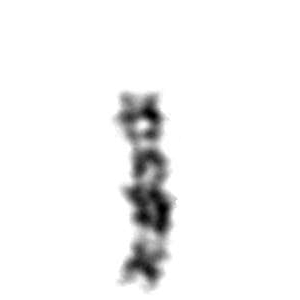

In [12]:
image['chr_05'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [13]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [14]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [15]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [16]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [17]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [18]:
chromConvert = {
               'chr_05': 0, 
               'chr_5_p14_deletion': 1
               }

In [19]:
chromConvert_reverse = {
                0: 'chr_05',
                1: 'chr_5_p14_deletion'
               }

In [20]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [21]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [22]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [23]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
len(X_train)

237

In [25]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [26]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [29]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [30]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### 3.2.5. Compile the modal

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [32]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/500
4/4 [==============================] - 6s 905ms/step - loss: 691.0374 - accuracy: 0.5443 - val_loss: 109.3305 - val_accuracy: 0.2750
Epoch 2/500
4/4 [==============================] - 0s 127ms/step - loss: 32.7096 - accuracy: 0.6371 - val_loss: 0.6086 - val_accuracy: 0.7250
Epoch 3/500
4/4 [==============================] - 0s 129ms/step - loss: 0.5785 - accuracy: 0.7426 - val_loss: 0.5904 - val_accuracy: 0.7250
Epoch 4/500
4/4 [==============================] - 1s 184ms/step - loss: 0.5345 - accuracy: 0.7595 - val_loss: 0.5714 - val_accuracy: 0.7250
Epoch 5/500
4/4 [==============================] - 0s 121ms/step - loss: 0.3480 - accuracy: 0.8186 - val_loss: 0.7472 - val_accuracy: 0.8250
Epoch 6/500
4/4 [==============================] - 0s 122ms/step - loss: 0.1688 - accuracy: 0.9325 - val_loss: 0.8058 - val_accuracy: 0.8000
Epoch 7/500
4/4 [==============================] - 0s 121ms/step - loss: 0.0824 - accuracy: 0.9662 - val_loss: 0.7632 - val_accuracy: 0.8250
Epoch 8/

Epoch 58/500
4/4 [==============================] - 0s 127ms/step - loss: 7.7008e-07 - accuracy: 1.0000 - val_loss: 2.6309 - val_accuracy: 0.8500
Epoch 59/500
4/4 [==============================] - 0s 124ms/step - loss: 7.5297e-07 - accuracy: 1.0000 - val_loss: 2.6308 - val_accuracy: 0.8500
Epoch 60/500
4/4 [==============================] - 0s 126ms/step - loss: 7.3889e-07 - accuracy: 1.0000 - val_loss: 2.6309 - val_accuracy: 0.8500
Epoch 61/500
4/4 [==============================] - 0s 123ms/step - loss: 7.2280e-07 - accuracy: 1.0000 - val_loss: 2.6312 - val_accuracy: 0.8500
Epoch 62/500
4/4 [==============================] - 0s 126ms/step - loss: 7.0972e-07 - accuracy: 1.0000 - val_loss: 2.6313 - val_accuracy: 0.8500
Epoch 63/500
4/4 [==============================] - 0s 126ms/step - loss: 6.9865e-07 - accuracy: 1.0000 - val_loss: 2.6315 - val_accuracy: 0.8500
Epoch 64/500
4/4 [==============================] - 0s 124ms/step - loss: 6.8608e-07 - accuracy: 1.0000 - val_loss: 2.6314 -

4/4 [==============================] - 2s 469ms/step - loss: 3.4455e-07 - accuracy: 1.0000 - val_loss: 2.6283 - val_accuracy: 0.8500
Epoch 115/500
4/4 [==============================] - 0s 126ms/step - loss: 3.4002e-07 - accuracy: 1.0000 - val_loss: 2.6282 - val_accuracy: 0.8500
Epoch 116/500
4/4 [==============================] - 0s 124ms/step - loss: 3.3751e-07 - accuracy: 1.0000 - val_loss: 2.6279 - val_accuracy: 0.8500
Epoch 117/500
4/4 [==============================] - 0s 118ms/step - loss: 3.3449e-07 - accuracy: 1.0000 - val_loss: 2.6276 - val_accuracy: 0.8500
Epoch 118/500
4/4 [==============================] - 0s 127ms/step - loss: 3.3097e-07 - accuracy: 1.0000 - val_loss: 2.6272 - val_accuracy: 0.8500
Epoch 119/500
4/4 [==============================] - 0s 124ms/step - loss: 3.2694e-07 - accuracy: 1.0000 - val_loss: 2.6269 - val_accuracy: 0.8500
Epoch 120/500
4/4 [==============================] - 0s 128ms/step - loss: 3.2342e-07 - accuracy: 1.0000 - val_loss: 2.6268 - val_ac

Epoch 170/500
4/4 [==============================] - 0s 130ms/step - loss: 2.1025e-07 - accuracy: 1.0000 - val_loss: 2.6167 - val_accuracy: 0.8500
Epoch 171/500
4/4 [==============================] - 0s 129ms/step - loss: 2.0874e-07 - accuracy: 1.0000 - val_loss: 2.6164 - val_accuracy: 0.8500
Epoch 172/500
4/4 [==============================] - 0s 126ms/step - loss: 2.0824e-07 - accuracy: 1.0000 - val_loss: 2.6163 - val_accuracy: 0.8500
Epoch 173/500
4/4 [==============================] - 0s 126ms/step - loss: 2.0572e-07 - accuracy: 1.0000 - val_loss: 2.6161 - val_accuracy: 0.8500
Epoch 174/500
4/4 [==============================] - 0s 129ms/step - loss: 2.0371e-07 - accuracy: 1.0000 - val_loss: 2.6160 - val_accuracy: 0.8500
Epoch 175/500
4/4 [==============================] - 0s 125ms/step - loss: 2.0170e-07 - accuracy: 1.0000 - val_loss: 2.6159 - val_accuracy: 0.8500
Epoch 176/500
4/4 [==============================] - 0s 127ms/step - loss: 2.0019e-07 - accuracy: 1.0000 - val_loss: 2

Epoch 226/500
4/4 [==============================] - 0s 124ms/step - loss: 1.4235e-07 - accuracy: 1.0000 - val_loss: 2.6081 - val_accuracy: 0.8500
Epoch 227/500
4/4 [==============================] - 0s 122ms/step - loss: 1.4134e-07 - accuracy: 1.0000 - val_loss: 2.6077 - val_accuracy: 0.8500
Epoch 228/500
4/4 [==============================] - 0s 130ms/step - loss: 1.4084e-07 - accuracy: 1.0000 - val_loss: 2.6073 - val_accuracy: 0.8500
Epoch 229/500
4/4 [==============================] - 0s 127ms/step - loss: 1.4033e-07 - accuracy: 1.0000 - val_loss: 2.6069 - val_accuracy: 0.8500
Epoch 230/500
4/4 [==============================] - 0s 126ms/step - loss: 1.3933e-07 - accuracy: 1.0000 - val_loss: 2.6067 - val_accuracy: 0.8500
Epoch 231/500
4/4 [==============================] - 0s 128ms/step - loss: 1.3832e-07 - accuracy: 1.0000 - val_loss: 2.6066 - val_accuracy: 0.8500
Epoch 232/500
4/4 [==============================] - 0s 125ms/step - loss: 1.3782e-07 - accuracy: 1.0000 - val_loss: 2

Epoch 282/500
4/4 [==============================] - 0s 130ms/step - loss: 1.0110e-07 - accuracy: 1.0000 - val_loss: 2.5989 - val_accuracy: 0.8500
Epoch 283/500
4/4 [==============================] - 0s 126ms/step - loss: 1.0060e-07 - accuracy: 1.0000 - val_loss: 2.5987 - val_accuracy: 0.8500
Epoch 284/500
4/4 [==============================] - 1s 129ms/step - loss: 1.0010e-07 - accuracy: 1.0000 - val_loss: 2.5985 - val_accuracy: 0.8500
Epoch 285/500
4/4 [==============================] - 0s 121ms/step - loss: 9.9089e-08 - accuracy: 1.0000 - val_loss: 2.5983 - val_accuracy: 0.8500
Epoch 286/500
4/4 [==============================] - 1s 134ms/step - loss: 9.8586e-08 - accuracy: 1.0000 - val_loss: 2.5981 - val_accuracy: 0.8500
Epoch 287/500
4/4 [==============================] - 0s 127ms/step - loss: 9.7078e-08 - accuracy: 1.0000 - val_loss: 2.5979 - val_accuracy: 0.8500
Epoch 288/500
4/4 [==============================] - 0s 121ms/step - loss: 9.7078e-08 - accuracy: 1.0000 - val_loss: 2

Epoch 338/500
4/4 [==============================] - 1s 131ms/step - loss: 7.4443e-08 - accuracy: 1.0000 - val_loss: 2.5910 - val_accuracy: 0.8500
Epoch 339/500
4/4 [==============================] - 0s 130ms/step - loss: 7.4443e-08 - accuracy: 1.0000 - val_loss: 2.5910 - val_accuracy: 0.8500
Epoch 340/500
4/4 [==============================] - 0s 127ms/step - loss: 7.3940e-08 - accuracy: 1.0000 - val_loss: 2.5908 - val_accuracy: 0.8500
Epoch 341/500
4/4 [==============================] - 0s 125ms/step - loss: 7.3437e-08 - accuracy: 1.0000 - val_loss: 2.5907 - val_accuracy: 0.8500
Epoch 342/500
4/4 [==============================] - 0s 128ms/step - loss: 7.3437e-08 - accuracy: 1.0000 - val_loss: 2.5906 - val_accuracy: 0.8500
Epoch 343/500
4/4 [==============================] - 0s 130ms/step - loss: 7.3437e-08 - accuracy: 1.0000 - val_loss: 2.5906 - val_accuracy: 0.8500
Epoch 344/500
4/4 [==============================] - 1s 129ms/step - loss: 7.3437e-08 - accuracy: 1.0000 - val_loss: 2

Epoch 394/500
4/4 [==============================] - 0s 130ms/step - loss: 5.7844e-08 - accuracy: 1.0000 - val_loss: 2.5874 - val_accuracy: 0.8500
Epoch 395/500
4/4 [==============================] - 1s 138ms/step - loss: 5.7844e-08 - accuracy: 1.0000 - val_loss: 2.5874 - val_accuracy: 0.8500
Epoch 396/500
4/4 [==============================] - 0s 127ms/step - loss: 5.7341e-08 - accuracy: 1.0000 - val_loss: 2.5874 - val_accuracy: 0.8500
Epoch 397/500
4/4 [==============================] - 1s 132ms/step - loss: 5.7341e-08 - accuracy: 1.0000 - val_loss: 2.5874 - val_accuracy: 0.8500
Epoch 398/500
4/4 [==============================] - 0s 126ms/step - loss: 5.6838e-08 - accuracy: 1.0000 - val_loss: 2.5875 - val_accuracy: 0.8500
Epoch 399/500
4/4 [==============================] - 1s 133ms/step - loss: 5.6335e-08 - accuracy: 1.0000 - val_loss: 2.5875 - val_accuracy: 0.8500
Epoch 400/500
4/4 [==============================] - 0s 128ms/step - loss: 5.6335e-08 - accuracy: 1.0000 - val_loss: 2

Epoch 450/500
4/4 [==============================] - 0s 126ms/step - loss: 4.5772e-08 - accuracy: 1.0000 - val_loss: 2.5860 - val_accuracy: 0.8500
Epoch 451/500
4/4 [==============================] - 1s 130ms/step - loss: 4.5772e-08 - accuracy: 1.0000 - val_loss: 2.5859 - val_accuracy: 0.8500
Epoch 452/500
4/4 [==============================] - 0s 128ms/step - loss: 4.5772e-08 - accuracy: 1.0000 - val_loss: 2.5859 - val_accuracy: 0.8500
Epoch 453/500
4/4 [==============================] - 1s 135ms/step - loss: 4.5269e-08 - accuracy: 1.0000 - val_loss: 2.5860 - val_accuracy: 0.8500
Epoch 454/500
4/4 [==============================] - 0s 126ms/step - loss: 4.4766e-08 - accuracy: 1.0000 - val_loss: 2.5860 - val_accuracy: 0.8500
Epoch 455/500
4/4 [==============================] - 0s 126ms/step - loss: 4.4766e-08 - accuracy: 1.0000 - val_loss: 2.5860 - val_accuracy: 0.8500
Epoch 456/500
4/4 [==============================] - 1s 129ms/step - loss: 4.4766e-08 - accuracy: 1.0000 - val_loss: 2

### 3.2.7 Summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [34]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19264), started 17 days, 7:24:19 ago. (Use '!kill 19264' to kill it.)

## 3.8 Save the Model

In [35]:
model.save('saved_model/model_Chr_05_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_05_cnn_iteration_4\assets


## 3.9 Load the Model

In [36]:
model_reload = keras.models.load_model('saved_model/model_Chr_05_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [37]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.850


In [38]:
len(X_test)

40

In [39]:
y_predict = model_reload.predict(X_test)

In [40]:
len(y_predict)

40

In [41]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [42]:
len(y_predict_filtered)

40

In [43]:
label = ['chr_05', 'chr_5_p14_deletion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [44]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [45]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [46]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [47]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [48]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
y_predict

array([[1.00000000e+00, 6.96159304e-07],
       [1.03886448e-01, 9.89277720e-01],
       [9.99995589e-01, 1.31024804e-04],
       [1.00000000e+00, 1.30823514e-06],
       [1.00000000e+00, 3.94457933e-09],
       [1.00000000e+00, 5.65767948e-07],
       [1.00000000e+00, 8.99460390e-15],
       [1.00000000e+00, 1.19366730e-08],
       [1.59744211e-02, 9.99367893e-01],
       [1.00000000e+00, 5.53111654e-08],
       [1.00000000e+00, 1.58387192e-09],
       [9.99998093e-01, 9.81549019e-05],
       [1.00000000e+00, 3.16995389e-15],
       [1.00000000e+00, 1.93967325e-11],
       [1.00000000e+00, 7.76969267e-10],
       [9.99999285e-01, 5.37298256e-05],
       [1.00000000e+00, 2.64559173e-11],
       [9.99995470e-01, 1.19157012e-04],
       [1.00000000e+00, 2.06553551e-07],
       [1.00000000e+00, 5.44656977e-08],
       [1.00000000e+00, 1.19189780e-11],
       [1.00000000e+00, 2.44597698e-09],
       [1.00000000e+00, 1.39957795e-14],
       [1.00000000e+00, 1.07835841e-14],
       [1.000000

### 3.10.2. Classification Report

In [50]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                    precision    recall  f1-score   support

            chr_05       0.87      0.93      0.90        29
chr_5_p14_deletion       0.78      0.64      0.70        11

         micro avg       0.85      0.85      0.85        40
         macro avg       0.82      0.78      0.80        40
      weighted avg       0.85      0.85      0.85        40



### 3.10.3. Confusion Matrix

In [51]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_05_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_05,chr_5_p14_deletion
chr_05,27,2
chr_5_p14_deletion,4,7


#### Heat Map

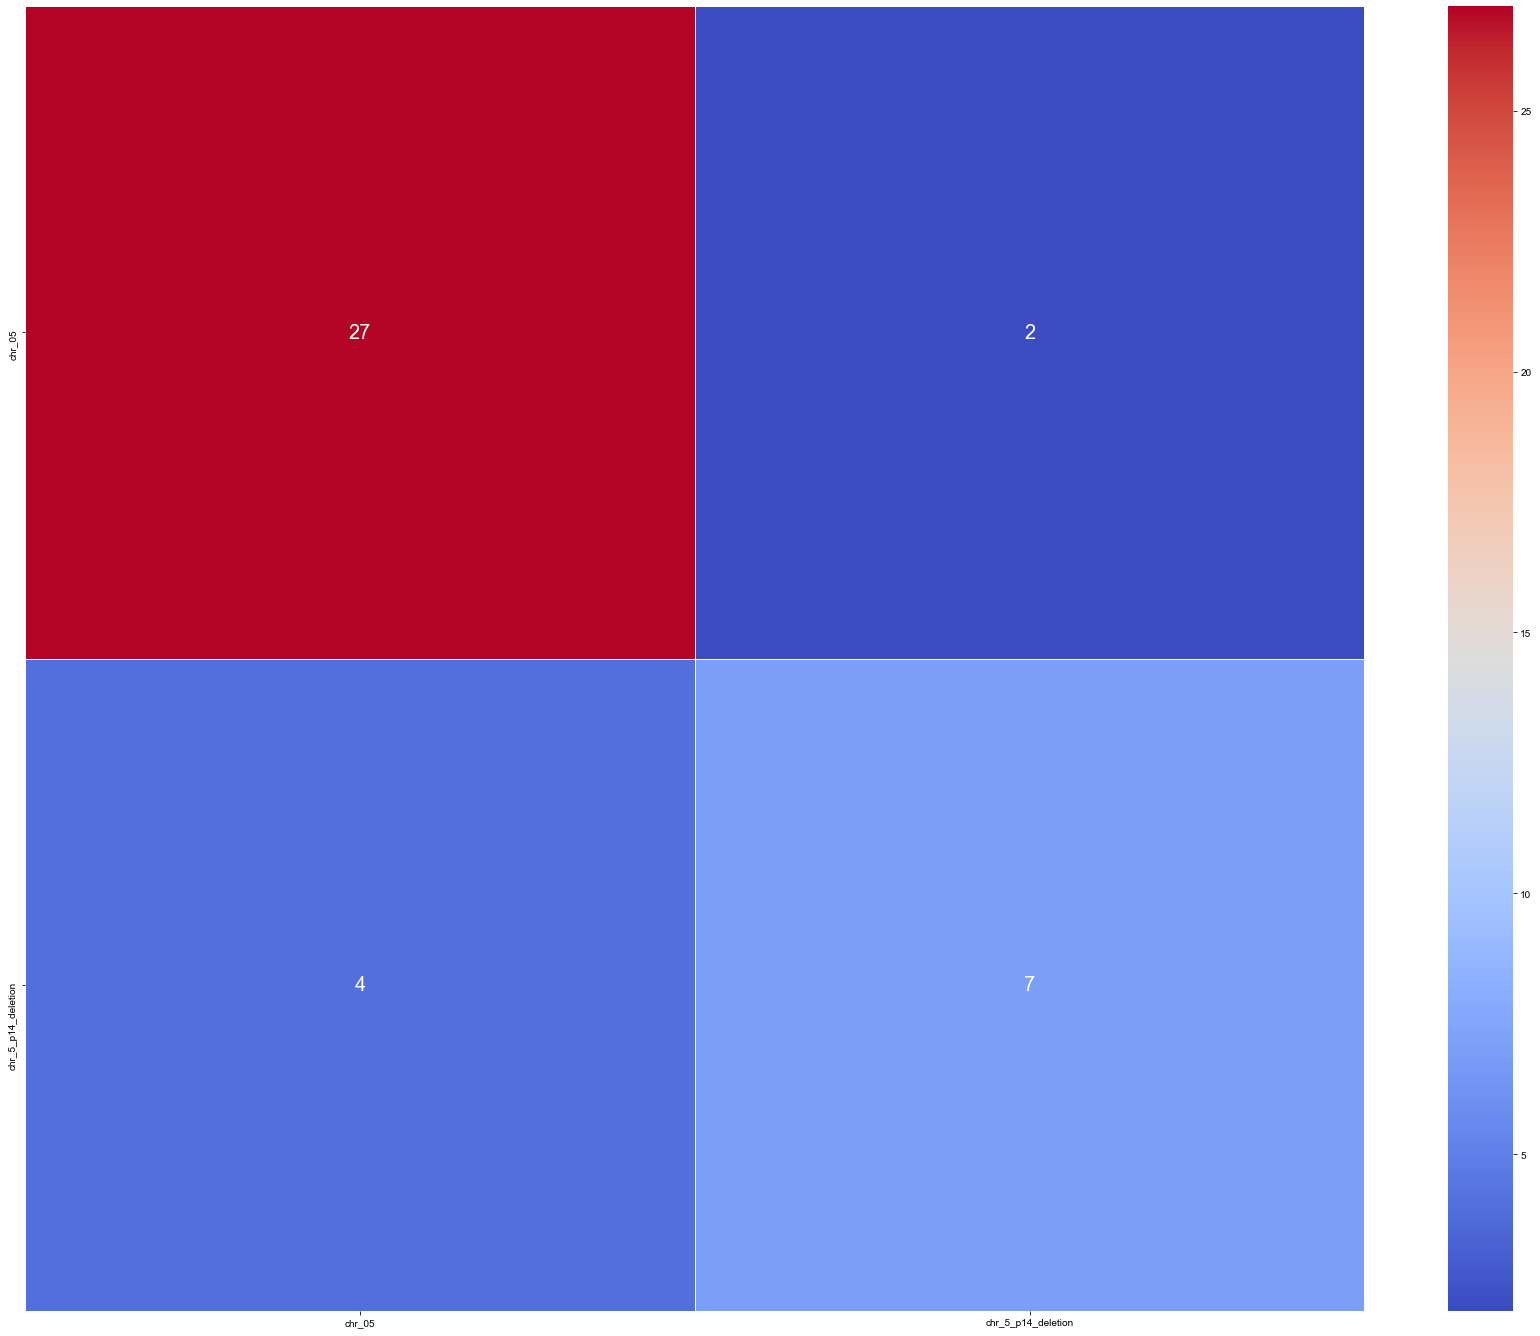

In [52]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [53]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_05_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [54]:
y_predict

array([[1.00000000e+00, 6.96159304e-07],
       [1.03886448e-01, 9.89277720e-01],
       [9.99995589e-01, 1.31024804e-04],
       [1.00000000e+00, 1.30823514e-06],
       [1.00000000e+00, 3.94457933e-09],
       [1.00000000e+00, 5.65767948e-07],
       [1.00000000e+00, 8.99460390e-15],
       [1.00000000e+00, 1.19366730e-08],
       [1.59744211e-02, 9.99367893e-01],
       [1.00000000e+00, 5.53111654e-08],
       [1.00000000e+00, 1.58387192e-09],
       [9.99998093e-01, 9.81549019e-05],
       [1.00000000e+00, 3.16995389e-15],
       [1.00000000e+00, 1.93967325e-11],
       [1.00000000e+00, 7.76969267e-10],
       [9.99999285e-01, 5.37298256e-05],
       [1.00000000e+00, 2.64559173e-11],
       [9.99995470e-01, 1.19157012e-04],
       [1.00000000e+00, 2.06553551e-07],
       [1.00000000e+00, 5.44656977e-08],
       [1.00000000e+00, 1.19189780e-11],
       [1.00000000e+00, 2.44597698e-09],
       [1.00000000e+00, 1.39957795e-14],
       [1.00000000e+00, 1.07835841e-14],
       [1.000000

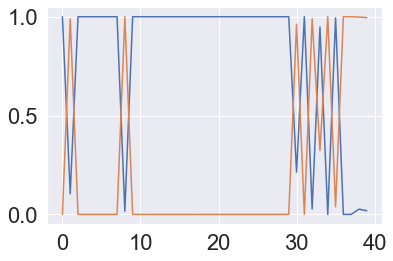

In [55]:
plt.plot(y_predict)

In [56]:
y_predict_1D = y_predict[:,0]

In [57]:
y_predict_1D_processed = 1- y_predict_1D

In [58]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [59]:
auc_rf

0.9106583072100314

In [60]:
x = y = np.arange(0,1.1,0.1)

In [61]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

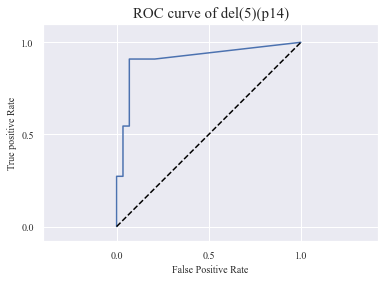

In [62]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of del(5)(p14)', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_05_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [63]:
auc_value = auc(fpr, tpr)

In [64]:
print('AUC is ', auc_value)

AUC is  0.9106583072100314


# Results

In [65]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.850


In [66]:
print(performanceReport)

                    precision    recall  f1-score   support

            chr_05       0.87      0.93      0.90        29
chr_5_p14_deletion       0.78      0.64      0.70        11

         micro avg       0.85      0.85      0.85        40
         macro avg       0.82      0.78      0.80        40
      weighted avg       0.85      0.85      0.85        40



In [67]:
type(performanceReport)

str

In [68]:
confusion

,chr_05,chr_5_p14_deletion
chr_05,27,2
chr_5_p14_deletion,4,7


In [69]:
print('AUC is ', auc_value)

AUC is  0.9106583072100314


## Export to a text file

In [70]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()